<a href="https://colab.research.google.com/github/Bonnnana/Introduction-to-Data-Science/blob/main/Lab/Lab_2(15_11_2024_09_30).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Requirements

In [205]:
# Add as many imports as you need.
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, accuracy_score

from sklearn.neighbors import KNeighborsClassifier


# Laboratory Exercise - Run Mode (8 points)

## The Gym Dataset
The dataset contains detailed information on 973 gym members' workout sessions, including their exercise routines, physical attributes, and fitness metrics. The features include age, gender, weight, height, heart rate data (maxiumum BPM, average BPM, and resting BPM), session duration, calories burned, workout type, body fat percentage, water intake, workout frequency, and experience level. Each feature provides insights into different aspects of a gym member's workout habits, physical health, and overall fitness progression. These attributes, except for the 'burned calories', can be used as input variables for analysis and modeling. The 'burned calories' attribute serves as the target variable, representing the total calories burned during each workout session. This dataset offers a comprehensive set of features, making it ideal for exploring and understanding the factors that influence calorie burn during workouts.

Load the dataset into a `pandas` data frame.

In [172]:
# Write your code here. Add as many boxes as you need.
data = pd.read_csv('/content/gym_members_exercise_tracking.csv')

Preprocess the input and the output variables appropriately.

In [173]:
# Write your code here. Add as many boxes as you need.
data

Age  Gender  Weight (kg)  Height (m)  Max_BPM  Avg_BPM  Resting_BPM  \
0     56    Male         88.3        1.71      180      157           60   
1     46  Female         74.9        1.53      179      151           66   
2     32  Female         68.1        1.66      167      122           54   
3     25    Male         53.2        1.70      190      164           56   
4     38    Male         46.1        1.79      188      158           68   
..   ...     ...          ...         ...      ...      ...          ...   
968   24    Male         87.1        1.74      187      158           67   
969   25    Male         66.6        1.61      184      166           56   
970   59  Female         60.4        1.76      194      120           53   
971   32    Male        126.4        1.83      198      146           62   
972   46    Male         88.7        1.63      166      146           66   

     Session_Duration (hours)  Calories_Burned Workout_Type  Fat_Percentage  \
0                        1.69           1313.0         Yoga            12.6   
1                        1.30            883.0         HIIT            33.9   
2                        1.11            677.0       Cardio            33.4   
3                        0.59            532.0     Strength            28.8   
4                        0.64            556.0     Strength            29.2   
..                        ...              ...          ...             ...   
968                      1.57           1364.0     Strength            10.0   
969                      1.38           1260.0     Strength            25.0   
970                      1.72            929.0       Cardio            18.8   
971                      1.10            883.0         HIIT            28.2   
972                      0.75            542.0     Strength            28.8   

     Water_Intake (liters)  Workout_Frequency (days/week)  Experience_Level  \
0                      3.5                              4                 3   
1                      2.1                              4                 2   
2                      2.3                              4                 2   
3                      2.1                              3                 1   
4                      2.8                              3                 1   
..                     ...                            ...               ...   
968                    3.5                              4                 3   
969                    3.0                              2                 1   
970                    2.7                              5                 3   
971                    2.1                              3                 2   
972                    3.5                              2                 1   

       BMI  
0    30.20  
1    32.00  
2    24.71  
3    18.41  
4    14.39  
..     ...  
968  28.77  
969  25.69  
970  19.50  
971  37.74  
972  33.38  

[973 rows x 15 columns]

In [174]:
classes1 = list(set(data['Gender']))
classes1

['Male', 'Female']

In [175]:
classes2 = list(set(data['Workout_Type']))
classes2

['HIIT', 'Strength', 'Cardio', 'Yoga']

In [176]:
# encoder = LabelEncoder()
# data['Gender']= encoder.fit_transform(data['Gender'])
# data['Workout_Type'] = encoder.fit_transform(data['Workout_Type'])
# data

dict1 = {}
for i in range(0,len(classes1)):
    dict1[classes1[i]] = i
dict1

{'Male': 0, 'Female': 1}

In [177]:
dict2 = {}
for i in range(0,len(classes2)):
    dict2[classes2[i]] = i
dict2

{'HIIT': 0, 'Strength': 1, 'Cardio': 2, 'Yoga': 3}

In [178]:
data['Gender'] = [dict1[val] for val in data['Gender']]
data['Workout_Type'] = [dict2[val] for val in data['Workout_Type']]


In [179]:
data.to_csv('not_scaled_data.csv')
data

Age  Gender  Weight (kg)  Height (m)  Max_BPM  Avg_BPM  Resting_BPM  \
0     56       0         88.3        1.71      180      157           60   
1     46       1         74.9        1.53      179      151           66   
2     32       1         68.1        1.66      167      122           54   
3     25       0         53.2        1.70      190      164           56   
4     38       0         46.1        1.79      188      158           68   
..   ...     ...          ...         ...      ...      ...          ...   
968   24       0         87.1        1.74      187      158           67   
969   25       0         66.6        1.61      184      166           56   
970   59       1         60.4        1.76      194      120           53   
971   32       0        126.4        1.83      198      146           62   
972   46       0         88.7        1.63      166      146           66   

     Session_Duration (hours)  Calories_Burned  Workout_Type  Fat_Percentage  \
0                        1.69           1313.0             3            12.6   
1                        1.30            883.0             0            33.9   
2                        1.11            677.0             2            33.4   
3                        0.59            532.0             1            28.8   
4                        0.64            556.0             1            29.2   
..                        ...              ...           ...             ...   
968                      1.57           1364.0             1            10.0   
969                      1.38           1260.0             1            25.0   
970                      1.72            929.0             2            18.8   
971                      1.10            883.0             0            28.2   
972                      0.75            542.0             1            28.8   

     Water_Intake (liters)  Workout_Frequency (days/week)  Experience_Level  \
0                      3.5                              4                 3   
1                      2.1                              4                 2   
2                      2.3                              4                 2   
3                      2.1                              3                 1   
4                      2.8                              3                 1   
..                     ...                            ...               ...   
968                    3.5                              4                 3   
969                    3.0                              2                 1   
970                    2.7                              5                 3   
971                    2.1                              3                 2   
972                    3.5                              2                 1   

       BMI  
0    30.20  
1    32.00  
2    24.71  
3    18.41  
4    14.39  
..     ...  
968  28.77  
969  25.69  
970  19.50  
971  37.74  
972  33.38  

[973 rows x 15 columns]

In [180]:
input = pd.concat([data.iloc[:, :8], data.iloc[:, 9:]], axis=1)
output= data['Calories_Burned']

Explore the dataset using visualizations of your choice.

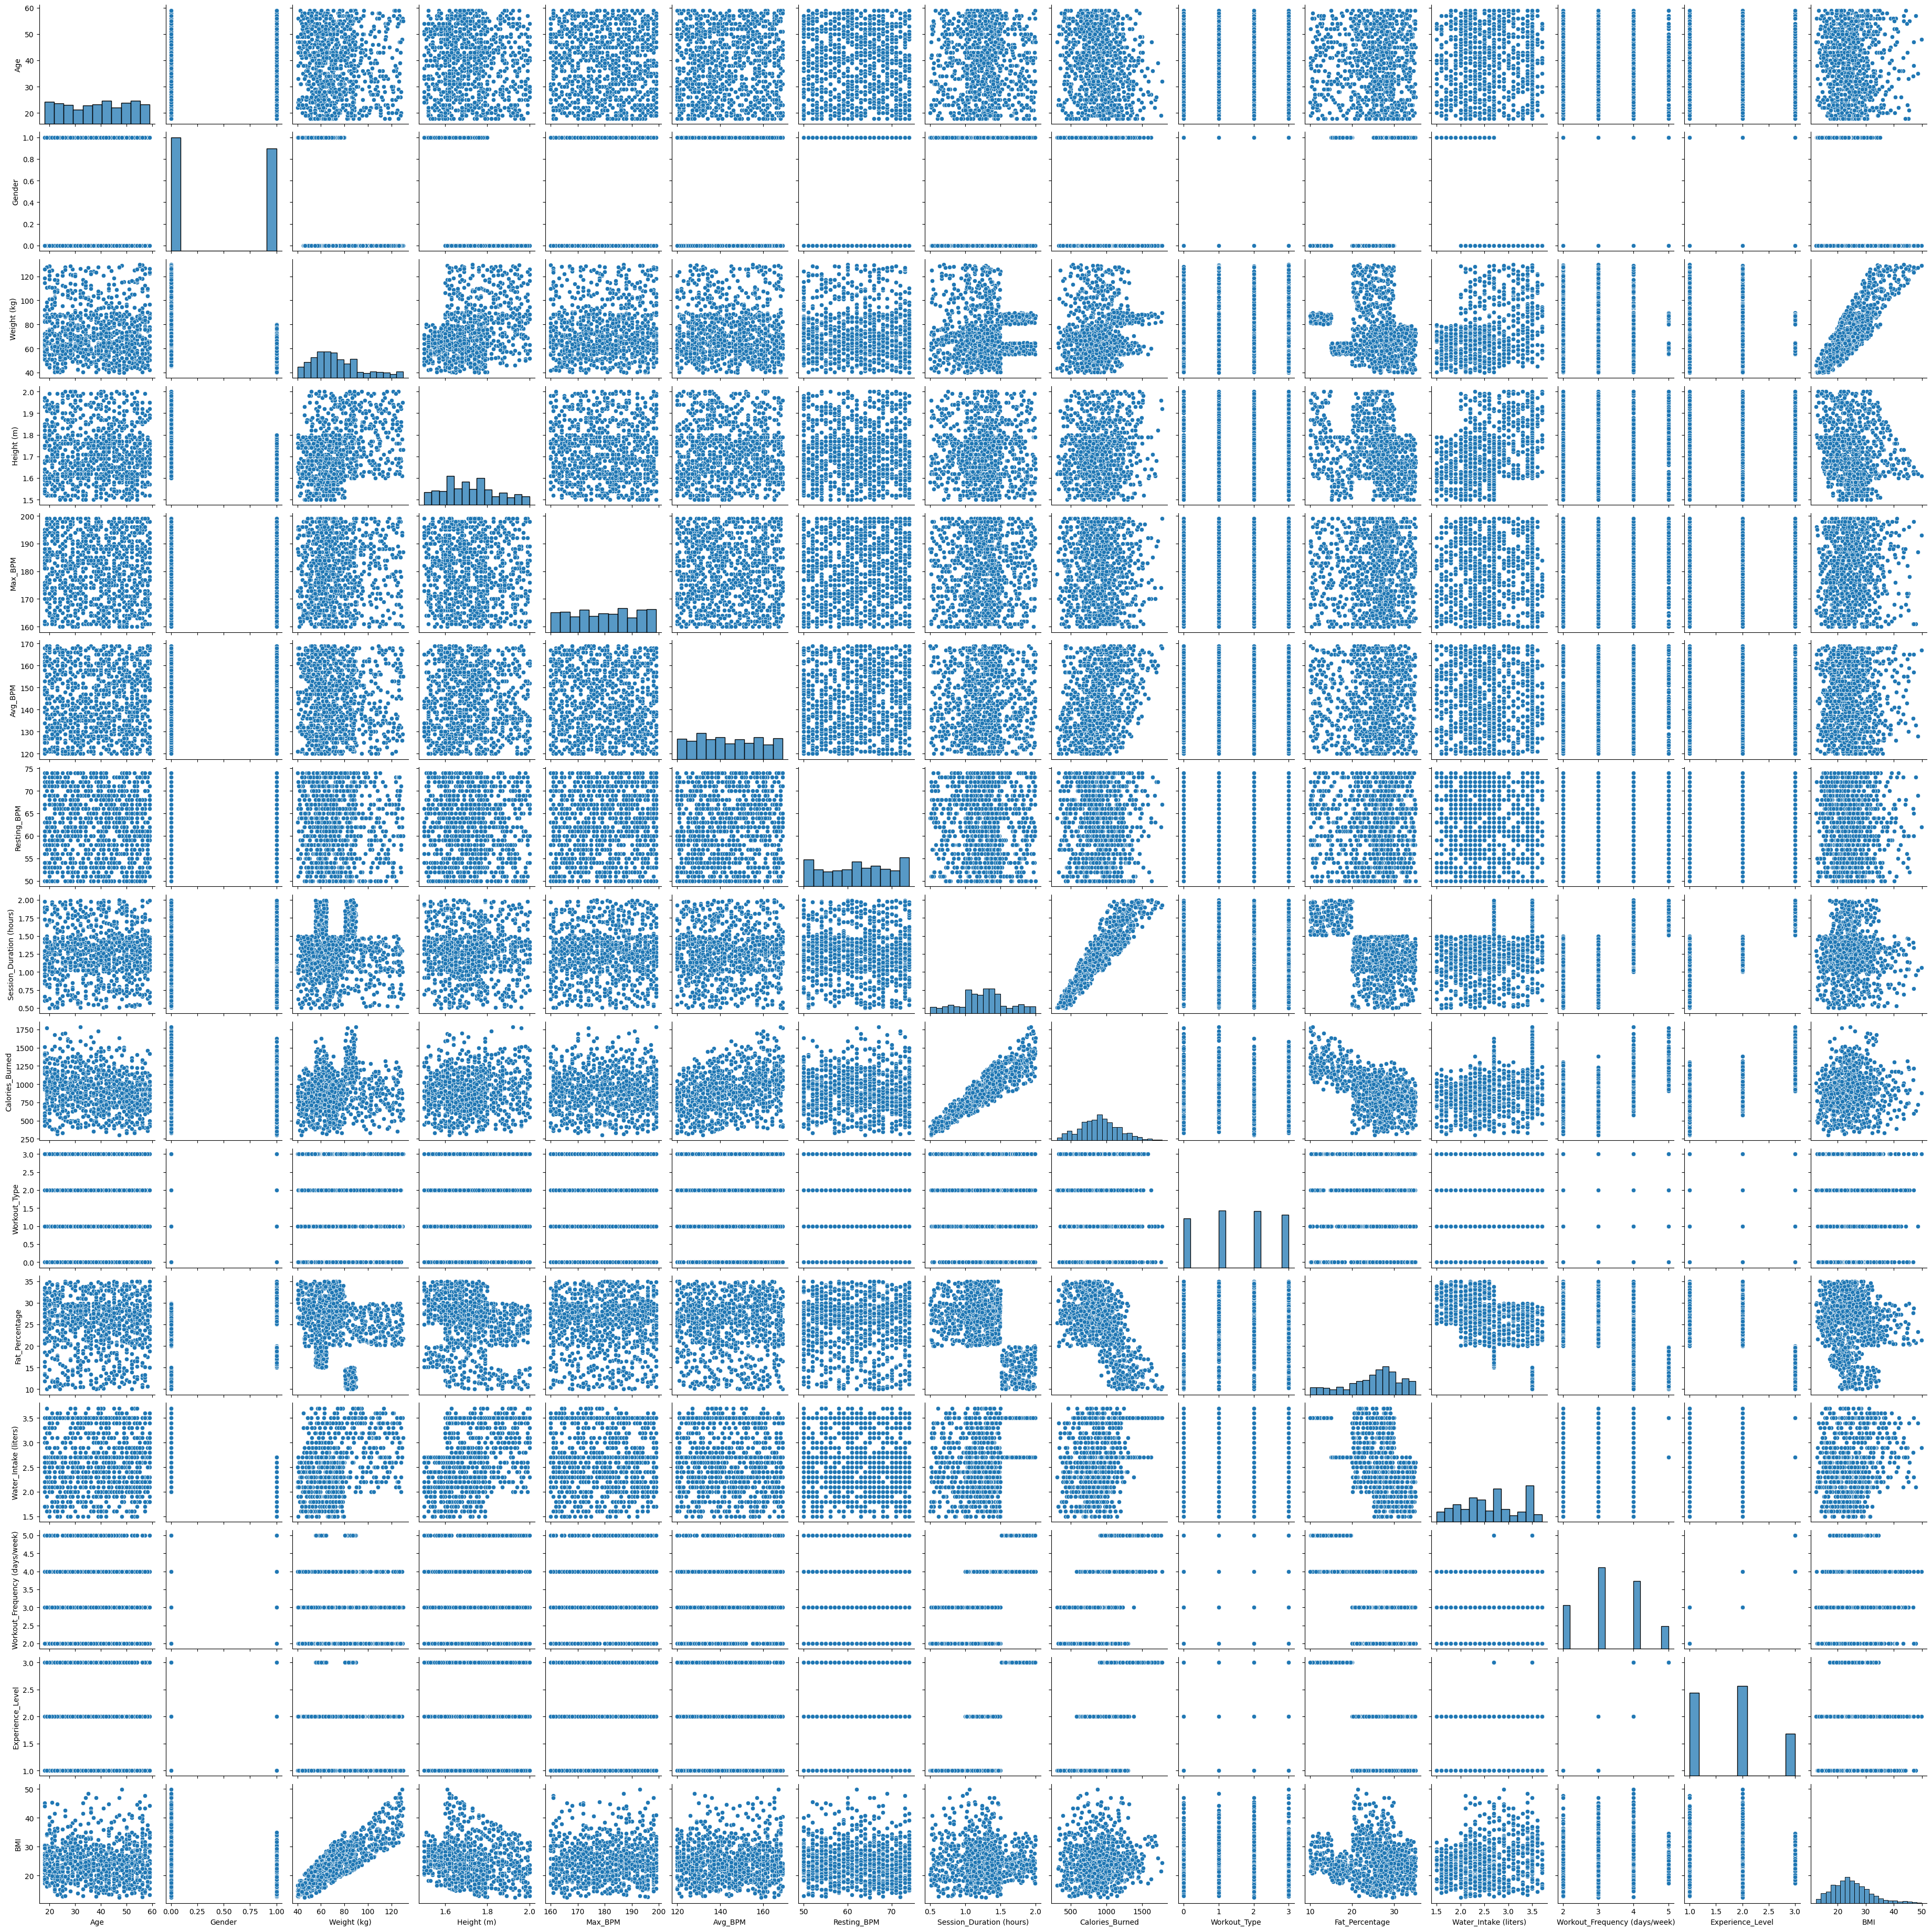

In [181]:
# Write your code here. Add as many boxes as you need.
sns.pairplot(data)
plt.show()

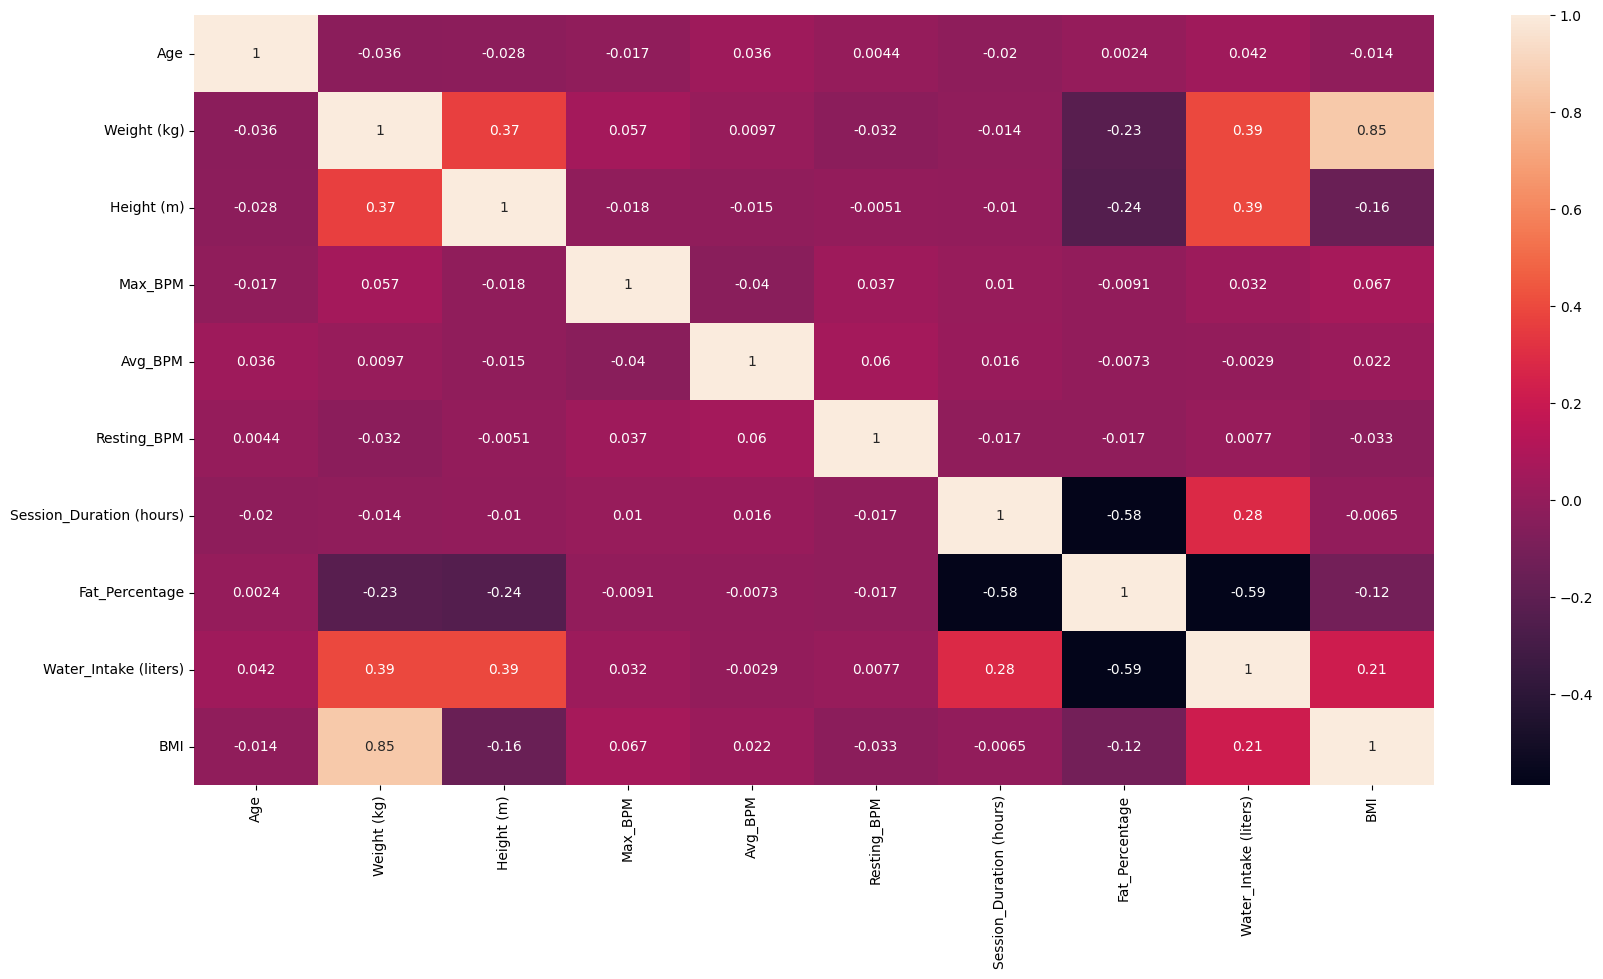

In [182]:
plt.figure(figsize=(20,10))
sns.heatmap(data.drop(columns=['Calories_Burned','Workout_Type', 'Gender', 'Workout_Frequency (days/week)', 'Experience_Level']).corr(), annot=True)
plt.show()

Check if the dataset is balanced.

In [183]:
# Write your code here. Add as many boxes as you need.

Target kolonata ne e kategorichna.

## Detecting Missing Values
Calculate the percentage of missing values present in each column of the dataset.

In [184]:
# Write your code here. Add as many boxes as you need.
missing_values= data.isnull().sum()
percentage = 100 * data.isnull().sum() / len(data)
missing_values_table = pd.concat([missing_values, percentage], axis=1)
missing_values_table.columns = ['Num. of missing values','% of missing values']
missing_values_table

Num. of missing values  % of missing values
Age                                                 0                  0.0
Gender                                              0                  0.0
Weight (kg)                                         0                  0.0
Height (m)                                          0                  0.0
Max_BPM                                             0                  0.0
Avg_BPM                                             0                  0.0
Resting_BPM                                         0                  0.0
Session_Duration (hours)                            0                  0.0
Calories_Burned                                     0                  0.0
Workout_Type                                        0                  0.0
Fat_Percentage                                      0                  0.0
Water_Intake (liters)                               0                  0.0
Workout_Frequency (days/week)                       0                  0.0
Experience_Level                                    0                  0.0
BMI                                                 0                  0.0

## Understanding the Causes Behind Missing Values
Using visualization tools such as heatmaps, and dendrograms, illustrate the interdependence between attributes with missing values. Also, visualize the distribution of the missing values within the dataset using matrices and bar charts.

In [185]:
# Write your code here. Add as many boxes as you need.

## Handling the Missing Values
Handle the missing values using suitable method based on the insights obtained from the various visualizations.

In [186]:
# Write your code here. Add as many boxes as you need.

## Dataset Splitting
Partition the dataset into training and testing sets with an 80:20 ratio.

In [187]:
# Write your code here. Add as many boxes as you need.
X_train, X_test, Y_train, Y_test = train_test_split(input,  output, test_size=0.2)

In [188]:
X_train.shape

(778, 14)

In [189]:
Y_train.shape

(778,)

## Feature Scaling
Standardize the features appropriately.

In [190]:
# Write your code here. Add as many boxes as you need.
scaler = StandardScaler()
numeric_cols = ['Weight (kg)', 'Height (m)', 'Max_BPM', 'Avg_BPM', 'Resting_BPM',
                'Session_Duration (hours)', 'Fat_Percentage', 'Water_Intake (liters)', 'BMI', 'Calories_Burned']
data[numeric_cols] = scaler.fit_transform(data[numeric_cols])

## Model Selection

Choose and train an approriate model for the given task.

In [191]:
# Write your code here. Add as many boxes as you need.
from xgboost import XGBRegressor

model = XGBRegressor(objective ='reg:linear',
    colsample_bytree = 0.3, learning_rate = 0.1,
    max_depth = 5, alpha = 2, n_estimators = 10)

model.fit(X_train, Y_train)


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [22:26:14] WARNING: /workspace/src/objective/regression_obj.cu:227: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


XGBRegressor(alpha=2, base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.3, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=10, n_jobs=None,
             num_parallel_tree=None, ...)

Use the trained model to make predictions for the test set.

In [192]:
# Write your code here. Add as many boxes as you need.
# make predictions
y_pred = model.predict(X_test)

Assess the performance of the model by using different classification metrics.

In [193]:
# Write your code here. Add as many boxes as you need.

print("MSE:", mean_squared_error(Y_test, y_pred))
print("MAE:", mean_absolute_error(Y_test, y_pred))
print("R² Score:", r2_score(Y_test, y_pred))

MSE: 34280.35996643508
MAE: 147.39935897435896
R² Score: 0.600311340004031


# Laboratory Exercise - Bonus Task (+ 2 points)

As part of the bonus task in this laboratory assignment, your objective is to fine-tune at least one hyper-parameter using a cross-validation with grid search. This involves systematically experimenting with various values for the hyper-parameter(s) and evaluating the model's performance using cross-validation. Upon determining the most suitable value(s) for the hyper-parameter(s), evaluate the model's performance on a test set for final assessment.

Hint: Use the `GridCVSearch` from the `scikit-learn` library. Check the documentation at https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html.

## Dataset Splitting
Partition the dataset into training and testing sets with an 90:10 ratio.

In [198]:
# Write your code here. Add as many boxes as you need.
data2 = pd.read_csv('/content/not_scaled_data.csv')
input2 = pd.concat([data2.iloc[:, :8], data2.iloc[:, 9:]], axis=1)
output2= data2['Calories_Burned']


In [200]:
X2_train, X2_test, Y2_train, Y2_test = train_test_split(input2,  output2, test_size=0.1)

## Feature Scaling
Standardize the features appropriately.

In [201]:
# Write your code here. Add as many boxes as you need.
scaler2 = StandardScaler()
numeric_cols = ['Weight (kg)', 'Height (m)', 'Max_BPM', 'Avg_BPM', 'Resting_BPM',
                'Session_Duration (hours)', 'Fat_Percentage', 'Water_Intake (liters)', 'BMI', 'Calories_Burned']
data[numeric_cols] = scaler2.fit_transform(data[numeric_cols])

## Fine-tuning the Hyperparameters
Experiment with various values for the chosen hyperparameter(s) and evaluate the model's performance using cross-validation.

In [209]:
# Write your code here. Add as many boxes as you need.
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedKFold
from sklearn.tree import DecisionTreeClassifier
cv = RepeatedKFold(n_splits=10, n_repeats=1, random_state=1)


model = DecisionTreeClassifier()

param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 5, 10],
}
grid_search = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    scoring='r2',
    cv=cv,
    verbose=1,
    n_jobs=-1
)
grid_search.fit(X2_train, Y2_train)
print("Best Hyperparameters:", grid_search.best_params_)
print("Best Cross-Validation Score:", grid_search.best_score_)


Fitting 10 folds for each of 72 candidates, totalling 720 fits
Best Hyperparameters: {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best Cross-Validation Score: 0.9912035192989107


## Final Assessment of the Model Performance
Upon determining the most suitable hyperparameter(s), evaluate the model's performance on a test set for final assessment.

In [210]:
# Write your code here. Add as many boxes as you need.
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X2_test)

print("MSE:", mean_squared_error(Y2_test, y_pred))
print("MAE:", mean_absolute_error(Y2_test, y_pred))
print("R² Score:", r2_score(Y2_test, y_pred))

MSE: 248.71428571428572
MAE: 6.857142857142857
R² Score: 0.9964070186512797
